# Linear Regression: Using a Decomposition (Cholesky Method)
--------------------------------

This script will use TensorFlow's function, `tf.cholesky()` to decompose our design matrix and solve for the parameter matrix from linear regression.

For linear regression we are given the system $A \cdot x = y$.  Here, $A$ is our design matrix, $x$ is our parameter matrix (of interest), and $y$ is our target matrix (dependent values).

For a Cholesky decomposition to work we assume that $A$ can be broken up into a product of a lower triangular matrix, $L$ and the transpose of the same matrix, $L^{T}$.

Note that this is when $A$ is square.  Of course, with an over determined system, $A$ is not square.  So we factor the product $A^{T} \cdot A$ instead.  We then assume:

$$A^{T} \cdot A = L^{T} \cdot L$$

For more information on the Cholesky decomposition and it's uses, see the following wikipedia link: [The Cholesky Decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition)

Given that $A$ has a unique Cholesky decomposition, we can write our linear regression system as the following:

$$ L^{T} \cdot L \cdot x = A^{T} \cdot y $$

Then we break apart the system as follows:

$$L^{T} \cdot z = A^{T} \cdot y$$

and

$$L \cdot x = z$$

The steps we will take to solve for $x$ are the following

 1. Compute the Cholesky decomposition of $A$, where $A^{T} \cdot A = L^{T} \cdot L$.

 2. Solve ($L^{T} \cdot z = A^{T} \cdot y$) for $z$.
 
 3. Finally, solve ($L \cdot x = z$) for $x$.
 
We start by loading the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/hduser/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hduser/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hduser/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hduser/anaconda3/envs/myenv/lib/python3.7/s

Next we create a graph session

In [2]:
sess = tf.Session()

We use the same method of generating data as in the prior recipe for consistency.

In [3]:
# Create the data
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

We generate the design matrix, $A$.

In [4]:
# Create design matrix
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

Next, we generate the 

In [5]:
# Create y matrix
y = np.transpose(np.matrix(y_vals))

# Create tensors
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

Now we calculate the square of the matrix $A$ and the Cholesky decomposition.

In [7]:
# Find Cholesky Decomposition
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor) # A_T * A
L = tf.cholesky(tA_A) # L_T* L = A_T * A, where Ls are triangular

We solve the first equation. (see step 2 in the intro paragraph above)

In [9]:
# Solve L*y=t(A)*b
tA_y = tf.matmul(tf.transpose(A_tensor), y) # A_T * y
sol1 = tf.matrix_solve(L, tA_y) # L_T * z = A_T * y

We finally solve for the parameter matrix by solving the second equation (see step 3 in the intro paragraph).

In [10]:
# Solve L' * y = sol1
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

solution_eval = sess.run(sol2)

Extract the coefficients and create the best fit line.

In [11]:
# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

slope: 1.0078929242831909
y_intercept: 0.05910865495783386


Finally, we plot the fit with Matplotlib.

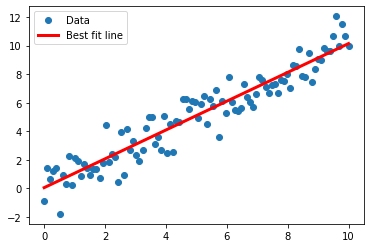

In [12]:
# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()